In [2]:
import os
os.environ['OPENBLAS_NUM_THREADS'] ='10'
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
from scipy.io import loadmat
from scipy.io import savemat
import matplotlib.pyplot as plt 
import pandas as pd
import struct
import json
import sys
import seaborn as sns 
from scipy import signal, stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
import functools
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [60]:
import ipynb.fs.defs.Spectral_clustering_pipeline
import ipynb.fs.defs.prediction_strength
from ipynb.fs.defs.Spectral_clustering_pipeline import spectral_clustering
from ipynb.fs.defs.prediction_strength import cross_valdation_prediction_strength
from ipynb.fs.defs.prediction_strength import get_low_individual_ps_bursts
from ipynb.fs.defs.prediction_strength import get_low_and_high_ps_bursts_fold_with_labels
from ipynb.fs.defs.train_validation_split import k_fold_split
from ipynb.fs.defs.prediction_strength import plot_cluster_examples
from ipynb.fs.defs.prediction_strength import plot_mean_prediction_strengths
from ipynb.fs.defs.prediction_strength import plot_proportion_weighted_mean_prediction_strengths
from ipynb.fs.defs.prediction_strength import plot_mean_number_of_low_prediction_strength_samples
from ipynb.fs.defs.prediction_strength import calculate_prediction_strength_per_k

# Data

In [3]:
data_dir = '../Data/'

In [32]:
data_burst_by_time_20 = np.load(data_dir + 'raw_Data/data_burst_by_time_20.npy').T
data_burst_by_time_20_21 = np.load(data_dir + 'raw_Data/data_burst_by_time_20_21.npy').T
print("Averaged over channels (Day 20): ", data_burst_by_time.shape)
print("Averaged over channels (Day 20+21): ", data_burst_by_time_20_21.shape)

Averaged over channels (Day 20):  (13092, 3410)
Averaged over channels (Day 20+21):  (24663, 3410)


In [47]:
train_folds_20_21 = np.load(data_dir + "day_20_21_split/train_folds_day_20.npy") #"day_20_21_split/train_folds_day_20.npy") #50_50_split/train_folds_50_50.npy "culture_balanced/culture_balanced_training_split.npy"
valid_folds_20_21 = np.load(data_dir + "day_20_21_split/valid_folds_day_21.npy") #day_20_21_split/valid_folds_day_21.npy") #"culture_balanced/culture_balanced_validation_split.npy"
train_folds_20_21 = [train_folds_20_21]
valid_folds_20_21 = [valid_folds_20_21]
train_folds_20_21.append(valid_folds_20_21[0])
valid_folds_20_21.append(train_folds_20_21[0])




train_folds_20 = np.load(data_dir + "50_50_split/train_folds_50_50.npy")
valid_folds_20 = np.load(data_dir + "50_50_split/valid_folds_50_50.npy")

train_folds_21 = np.load(data_dir + "day_20_21_split/train_folds_50_50_21.npy")
valid_folds_21 = np.load(data_dir + "day_20_21_split/valid_folds_50_50_21.npy")

In [34]:
data_burst_by_time_21 = data_burst_by_time_20_21[valid_folds_20_21[0]]

In [16]:
#n_total = data_burst_by_time_21.shape[0] 
#n_shuffled = np.random.RandomState(seed=42).permutation(n_total) # randomly shuffle data 

#train_folds_21, valid_folds_21 = k_fold_split(n_shuffled, k_folds = 2) # k fold split indices 

#for i, fold in enumerate(train_folds_21):
#    print("Fold %d: Training Data: %d Bursts Validation Data: %d Bursts" % ((i+1),len(fold), len(valid_folds_21[i])))

Fold 1: Training Data: 5786 Bursts Validation Data: 5785 Bursts
Fold 2: Training Data: 5785 Bursts Validation Data: 5786 Bursts


In [17]:
#np.save(data_dir + "train_folds_50_50_21" , train_folds_21)
#np.save(data_dir + "valid_folds_50_50_21" , valid_folds_21)

# Spectral Clustering: 2 Fold split of day 21

In [19]:
data = data_burst_by_time_21

In [20]:
training_sets_21 = []
validation_sets_21 = []
for i, split in enumerate(train_folds_21):
    training_sets_21.append(data[split])
    validation_sets_21.append(data[valid_folds_21[i]])

In [22]:
for i, train_set in enumerate(training_sets_21):
    print("Split %d :" % (i+1))
    print("%d Bursts in Training Set equal to %.2f %% of the total data. " % (len(train_set), np.round((len(train_set)/len(data)), 4) * 100))
    print("%d Bursts in Validation Set equal to %.2f %% of the total data. " % (len(validation_sets_21[i]), np.round((len(validation_sets_21[i])/len(data)), 4) * 100))

Split 1 :
5786 Bursts in Training Set equal to 50.00 % of the total data. 
5785 Bursts in Validation Set equal to 50.00 % of the total data. 
Split 2 :
5785 Bursts in Training Set equal to 50.00 % of the total data. 
5786 Bursts in Validation Set equal to 50.00 % of the total data. 


In [23]:
n_clusters = range(1,21)
print("Number of clusters to look at: ", [x for x in n_clusters])

Number of clusters to look at:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [25]:
training_sets_labels_21 = []
for i,train_set in enumerate(training_sets_21):  
    print("Start Spectral Clustering for %d. Training Set" % (i+1))
    training_sets_labels_21.append(spectral_clustering(train_set, "euclidean",n_clusters,  k=5, mutual = False, weighting = "distance", normalize = True, reg_lambda = 0.1, save_laplacian = False, save_eigenvalues_and_vectors = False))

Start Spectral Clustering for 1. Training Set
Calculate Normalized Laplacians
Calculate Eigenvalues and Vectors of Laplacian
Start Spectral Clustering for 2. Training Set
Calculate Normalized Laplacians
Calculate Eigenvalues and Vectors of Laplacian


In [26]:
validation_sets_labels_21 = []
for i, valid_set in enumerate(validation_sets_21): 
    print("Start Spectral Clustering for %d. Validation Set" % (i+1))
    validation_sets_labels_21.append(spectral_clustering(valid_set, "euclidean",n_clusters,  k=5, mutual = False, weighting = "distance", normalize = True, reg_lambda = 0.1, save_laplacian = False, save_eigenvalues_and_vectors = False))

Start Spectral Clustering for 1. Validation Set
Calculate Normalized Laplacians
Calculate Eigenvalues and Vectors of Laplacian
Start Spectral Clustering for 2. Validation Set
Calculate Normalized Laplacians
Calculate Eigenvalues and Vectors of Laplacian


In [27]:
#np.save(data_dir + "day_20_21_split/training_sets_labels_50_50_split_day_21_euclidean_k=5_up_to_20_clusters", training_sets_labels_21)
#np.save(data_dir + "day_20_21_split/validation_sets_labels_50_50_split_day_21_euclidean_k=5_up_to_20_clusters", validation_sets_labels_21)

In [28]:
predictions_strengths_cv_per_sample, _ = cross_valdation_prediction_strength(data, train_folds_21, valid_folds_21, training_sets_labels_21, validation_sets_labels_21, per_sample = True)

Calculate Predictions Strength for 1. Fold
Calculate Predictions Strength for 2. Fold


In [29]:
predictions_strengths_cv,valid_fold_labels_predicted =  cross_valdation_prediction_strength(data, train_folds_21, valid_folds_21, training_sets_labels_21, validation_sets_labels_21, per_sample = False)

Calculate Predictions Strength for 1. Fold
Calculate Predictions Strength for 2. Fold


In [31]:
#np.save(data_dir  + 'predictions_strengths_cv_per_sample_day_21' , predictions_strengths_cv_per_sample)
#np.save(data_dir  + 'predictions_strengths_cv_day_21' , predictions_strengths_cv)
#np.save(data_dir  + 'valid_fold_labels_predicted_day_21', valid_fold_labels_predicted)

# Daywise Spectral Clustering Analysis

In [48]:
# labels
train_fold_labels_20_21 = np.load(data_dir + "day_20_21_split/training_sets_labels_day_20_euclidean_k=5_up_to_20_clusters.npy") 
valid_fold_labels_20_21 = np.load(data_dir + "day_20_21_split/validation_sets_labels_day_21_euclidean_k=5_up_to_20_clusters.npy") 
train_fold_labels_20_21 = [train_fold_labels_20_21[0]]
valid_fold_labels_20_21 = [valid_fold_labels_20_21[0]]
train_fold_labels_20_21.append(valid_fold_labels_20_21[0])
valid_fold_labels_20_21.append(train_fold_labels_20_21[0])




train_fold_labels_21 = np.load(data_dir + "day_20_21_split/training_sets_labels_50_50_split_day_21_euclidean_k=5_up_to_20_clusters.npy")
valid_fold_labels_21 = np.load(data_dir + "day_20_21_split/validation_sets_labels_50_50_split_day_21_euclidean_k=5_up_to_20_clusters.npy")

train_fold_labels_20 = np.load(data_dir + "50_50_split/training_sets_labels_50_50_euclidean_k=5_up_to_20_clusters.npy")
valid_fold_labels_20 = np.load(data_dir + "50_50_split/validation_sets_labels_50_50_euclidean_k=5_up_to_20_clusters.npy")

In [49]:
# prediction strength 
predictions_strengths_cv_per_sample_20_21 = list(np.load(data_dir + "day_20_21_split/prediction_strength_euclidean_k=5_per_sample.npy",allow_pickle=True))
predictions_strengths_cv_20_21 = list(np.load(data_dir + "day_20_21_split/prediction_strength_euclidean_k=5.npy", allow_pickle=True)) 
valid_fold_labels_predicted_20_21 = list(np.load(data_dir + "day_20_21_split/valid_fold_labels_predicted_euclidean_k=5.npy", allow_pickle=True))
k_predictions_strength_cv_20_21, k_valid_fold_labels_predicted_20_21, k_valid_fold_labels_20_21, valid_cluster_size_20_21, valid_cluster_size_predicted_20_21 = calculate_prediction_strength_per_k(predictions_strengths_cv_20_21,valid_fold_labels_20_21,valid_fold_labels_predicted_20_21, strength_sorted = True)


predictions_strengths_cv_per_sample_21 = list(np.load(data_dir + "day_20_21_split/predictions_strengths_cv_per_sample_day_21.npy",allow_pickle=True))
predictions_strengths_cv_21 = list(np.load(data_dir + "day_20_21_split/predictions_strengths_cv_day_21.npy", allow_pickle=True)) 
valid_fold_labels_predicted_21 = list(np.load(data_dir + "day_20_21_split/valid_fold_labels_predicted_day_21.npy", allow_pickle=True))
k_predictions_strength_cv_21, k_valid_fold_labels_predicted_21, k_valid_fold_labels_21, valid_cluster_size_21, valid_cluster_size_predicted_21 = calculate_prediction_strength_per_k(predictions_strengths_cv_21,valid_fold_labels_21,valid_fold_labels_predicted_21, strength_sorted = True)

predictions_strengths_cv_per_sample_20 = list(np.load(data_dir + "50_50_split/prediction_strength_euclidean_k=5_per_sample.npy",allow_pickle=True))
predictions_strengths_cv_20 = list(np.load(data_dir + "50_50_split/prediction_strength_euclidean_k=5.npy", allow_pickle=True)) 
valid_fold_labels_predicted_20 = list(np.load(data_dir + "50_50_split/valid_fold_labels_predicted_euclidean_k=5.npy", allow_pickle=True))
k_predictions_strength_cv_20, k_valid_fold_labels_predicted_20, k_valid_fold_labels_20, valid_cluster_size_20, valid_cluster_size_predicted_20 = calculate_prediction_strength_per_k(predictions_strengths_cv_20,valid_fold_labels_20,valid_fold_labels_predicted_20, strength_sorted = True)

In [169]:
def plot_mean_prediction_strengths(k_prediction_strengths_cv,threshold=0.8): 
    fig, ax = plt.subplots(figsize=(50,20))
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30) 
  
    n_clusters = range(1,len(k_prediction_strengths_cv)+1)
    mean_min_prediction_strengths = []
    err_min_prediction_strengths = []
  
    for i in n_clusters:   
        mean_min_prediction_strength_i = np.mean(np.mean(k_prediction_strengths_cv[i],axis=1))
        err_min_prediction_strength_i = np.std(np.mean(k_prediction_strengths_cv[i],axis=1))


        mean_min_prediction_strengths.append(mean_min_prediction_strength_i)
        err_min_prediction_strengths.append(err_min_prediction_strength_i)

  
    ax.errorbar(n_clusters, mean_min_prediction_strengths, yerr=err_min_prediction_strengths)
    
    for i,k in enumerate(n_clusters):
        ax.annotate("%.2f" % (mean_min_prediction_strengths[i]), (k+0.01,mean_min_prediction_strengths[i] + 0.01), fontsize = 15)
    


    
    if threshold:
        ax.axhline(threshold, color = "red", label = "Threshold")
    ax.set_title("Mean Prediction Strength", fontsize = 70,pad = 30)
    ax.set_xticks(n_clusters)
    ax.set_xlabel("Number of clusters",fontsize=50)
    ax.set_ylabel("prediction strength",fontsize=50) 
    ax.set_ylim((0,1.1))
    #ax.legend(fontsize = 35)
    
def plot_proportion_weighted_mean_prediction_strengths(k_predictions_strength_cv, valid_cluster_size,n_folds = 1,threshold = 0.8):
    fig, ax = plt.subplots(figsize=(50,20))
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30) 
    
    n_clusters = range(1,len(k_predictions_strength_cv)+1)
    mean_min_prediction_strengths = []
    err_min_prediction_strengths = []
    
    for i in n_clusters:
        #prop_cluster_sizes = np.asarray((valid_cluster_size[i])/np.sum(valid_cluster_size[i],axis = 1)[:, np.newaxis])           

        
        mean_min_prediction_strength_i = np.mean(np.sum(k_predictions_strength_cv[i]*np.asarray(valid_cluster_size[i]) ,axis = 1)/np.sum(valid_cluster_size[i],axis = 1))
        err_min_prediction_strength_i = np.std(np.sum(k_predictions_strength_cv[i]*np.asarray(valid_cluster_size[i]), axis = 1)/np.sum(valid_cluster_size[i],axis = 1))
        #mean_min_prediction_strength_i = np.mean(np.mean(k_predictions_strength_cv[i]*prop_cluster_sizes,axis=1))
        #err_min_prediction_strength_i = np.std(np.mean(k_predictions_strength_cv[i]*prop_cluster_sizes,axis=1))


        mean_min_prediction_strengths.append(mean_min_prediction_strength_i)
        err_min_prediction_strengths.append(err_min_prediction_strength_i)

  
    ax.errorbar(n_clusters, mean_min_prediction_strengths, yerr=err_min_prediction_strengths)
    for i,k in enumerate(n_clusters):
        ax.annotate("%.2f" % (mean_min_prediction_strengths[i]), (k+0.01,mean_min_prediction_strengths[i] + 0.01), fontsize = 15)
    
    
    if threshold:
        ax.axhline(threshold, color = "red", label = "Threshold")
        plt.yticks(list(plt.yticks()[0]) + [threshold])
    ax.set_title("Mean Prediction Strength weighted by Cluster Size", fontsize = 70,pad = 30)
    ax.set_xticks(n_clusters)
    ax.set_xlabel("Number of clusters",fontsize=50)
    ax.set_ylabel("prediction strength",fontsize=50) 
    ax.legend(fontsize = 35)
    ax.set_ylim((0,1.1))
    

In [171]:
data = data_burst_by_time_21
train_folds = train_folds_21
valid_folds = valid_folds_21
train_fold_labels = train_fold_labels_21
valid_fold_labels = valid_fold_labels_21

k_prediction_strength = k_predictions_strength_cv_21
predictions_strengths_per_sample = predictions_strengths_cv_per_sample_21
valid_cluster_size = valid_cluster_size_21
prediction_strength = predictions_strengths_cv_21


n_clusters = range(1,21)
threshold = 0.5
n_folds = 2

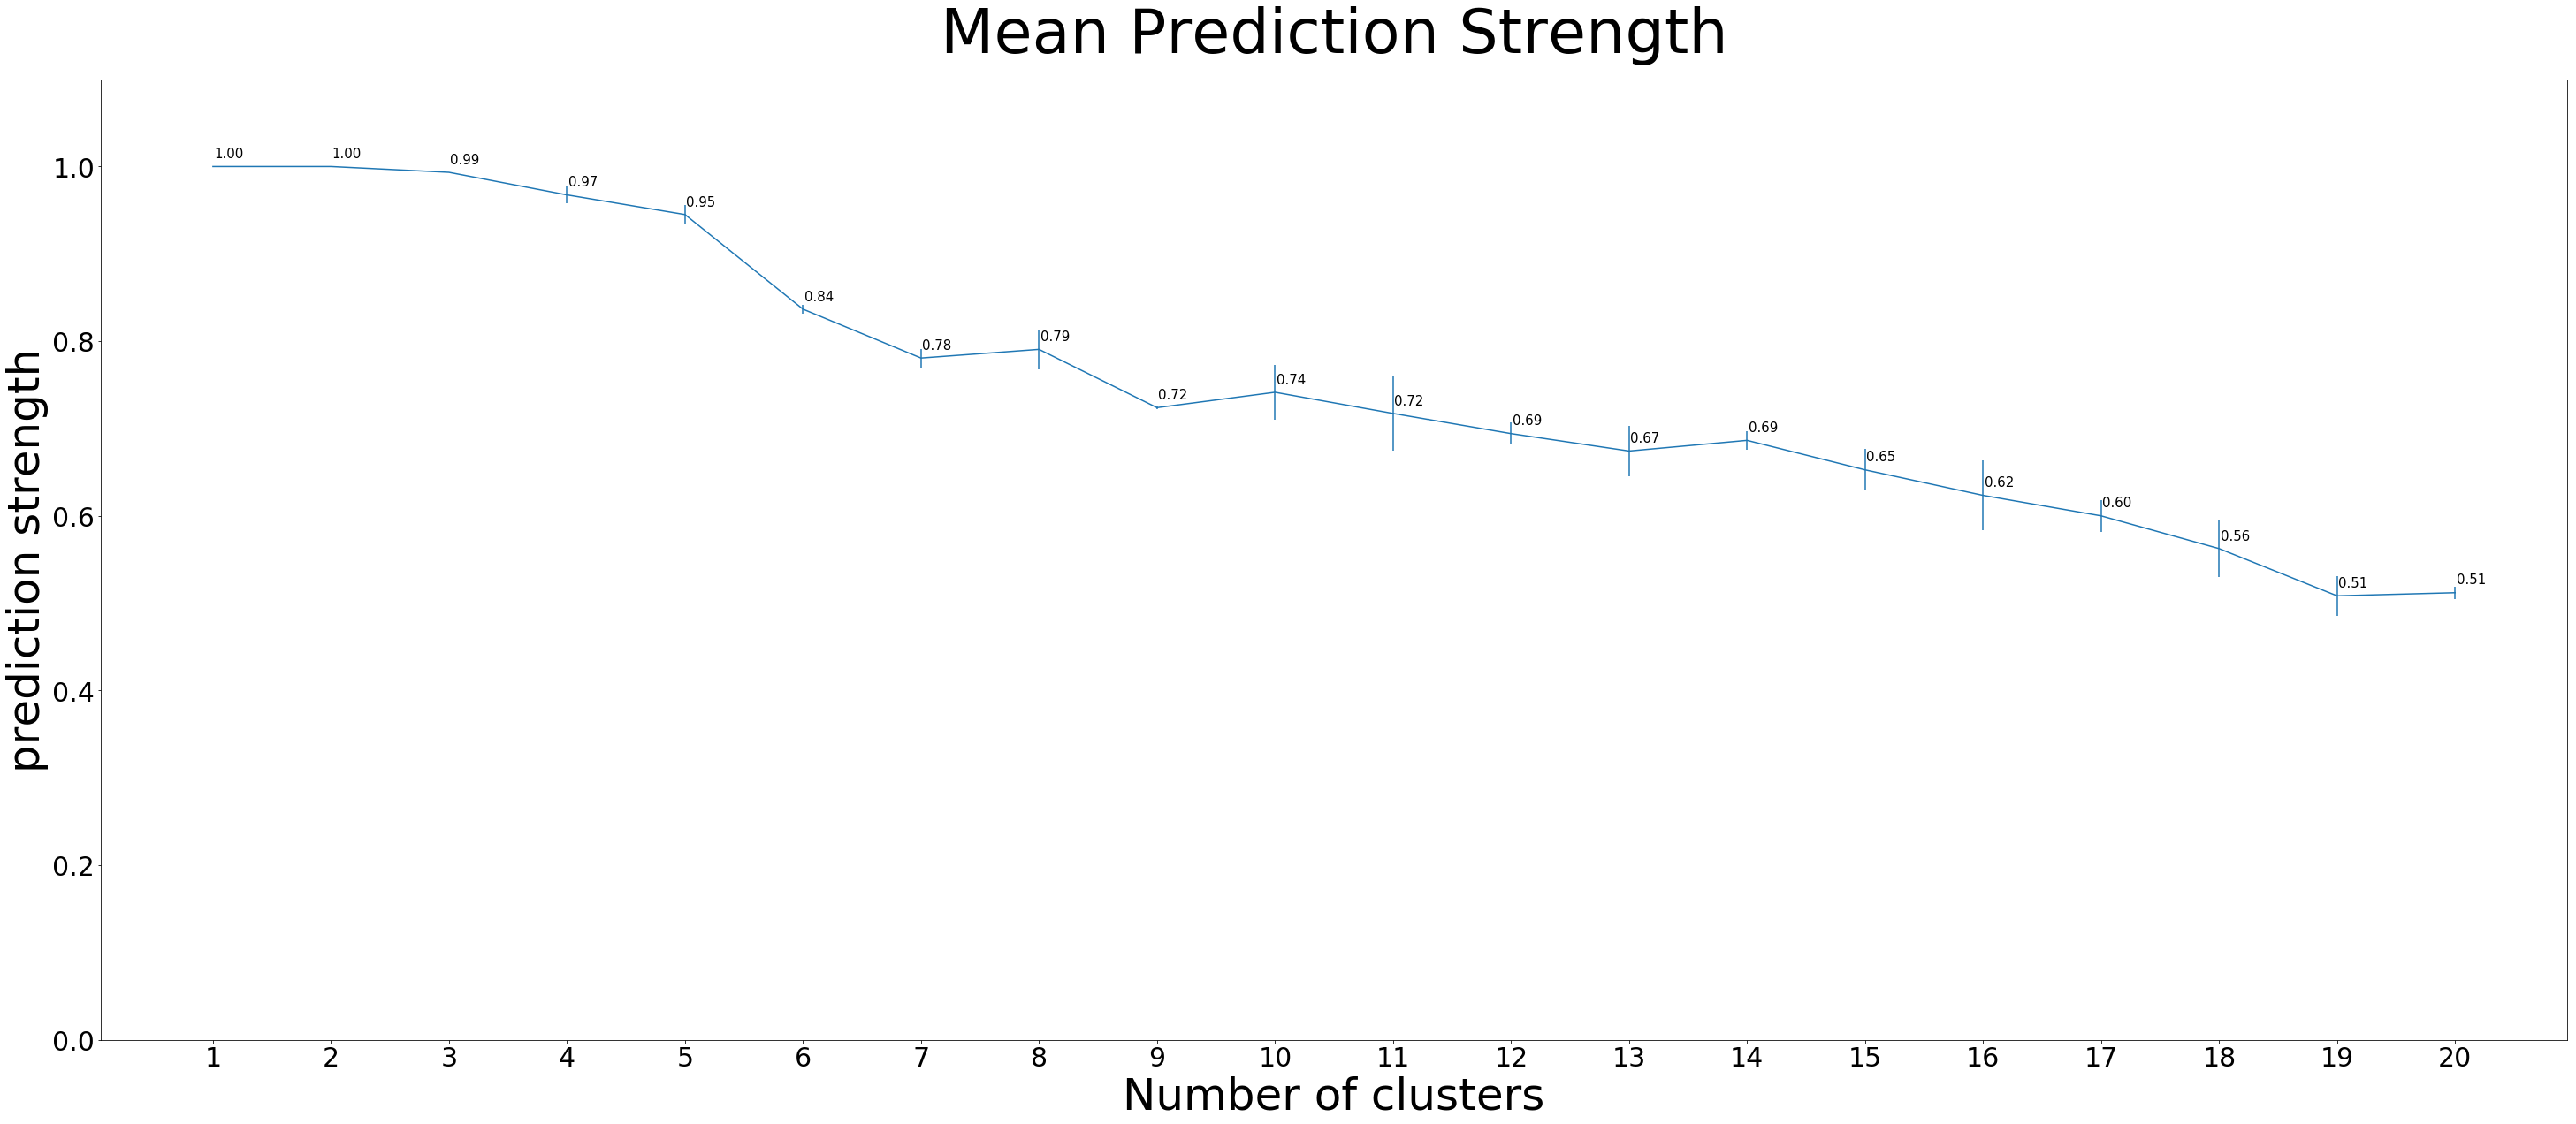

In [172]:
plot_mean_prediction_strengths(k_prediction_strength, threshold = None)

No handles with labels found to put in legend.


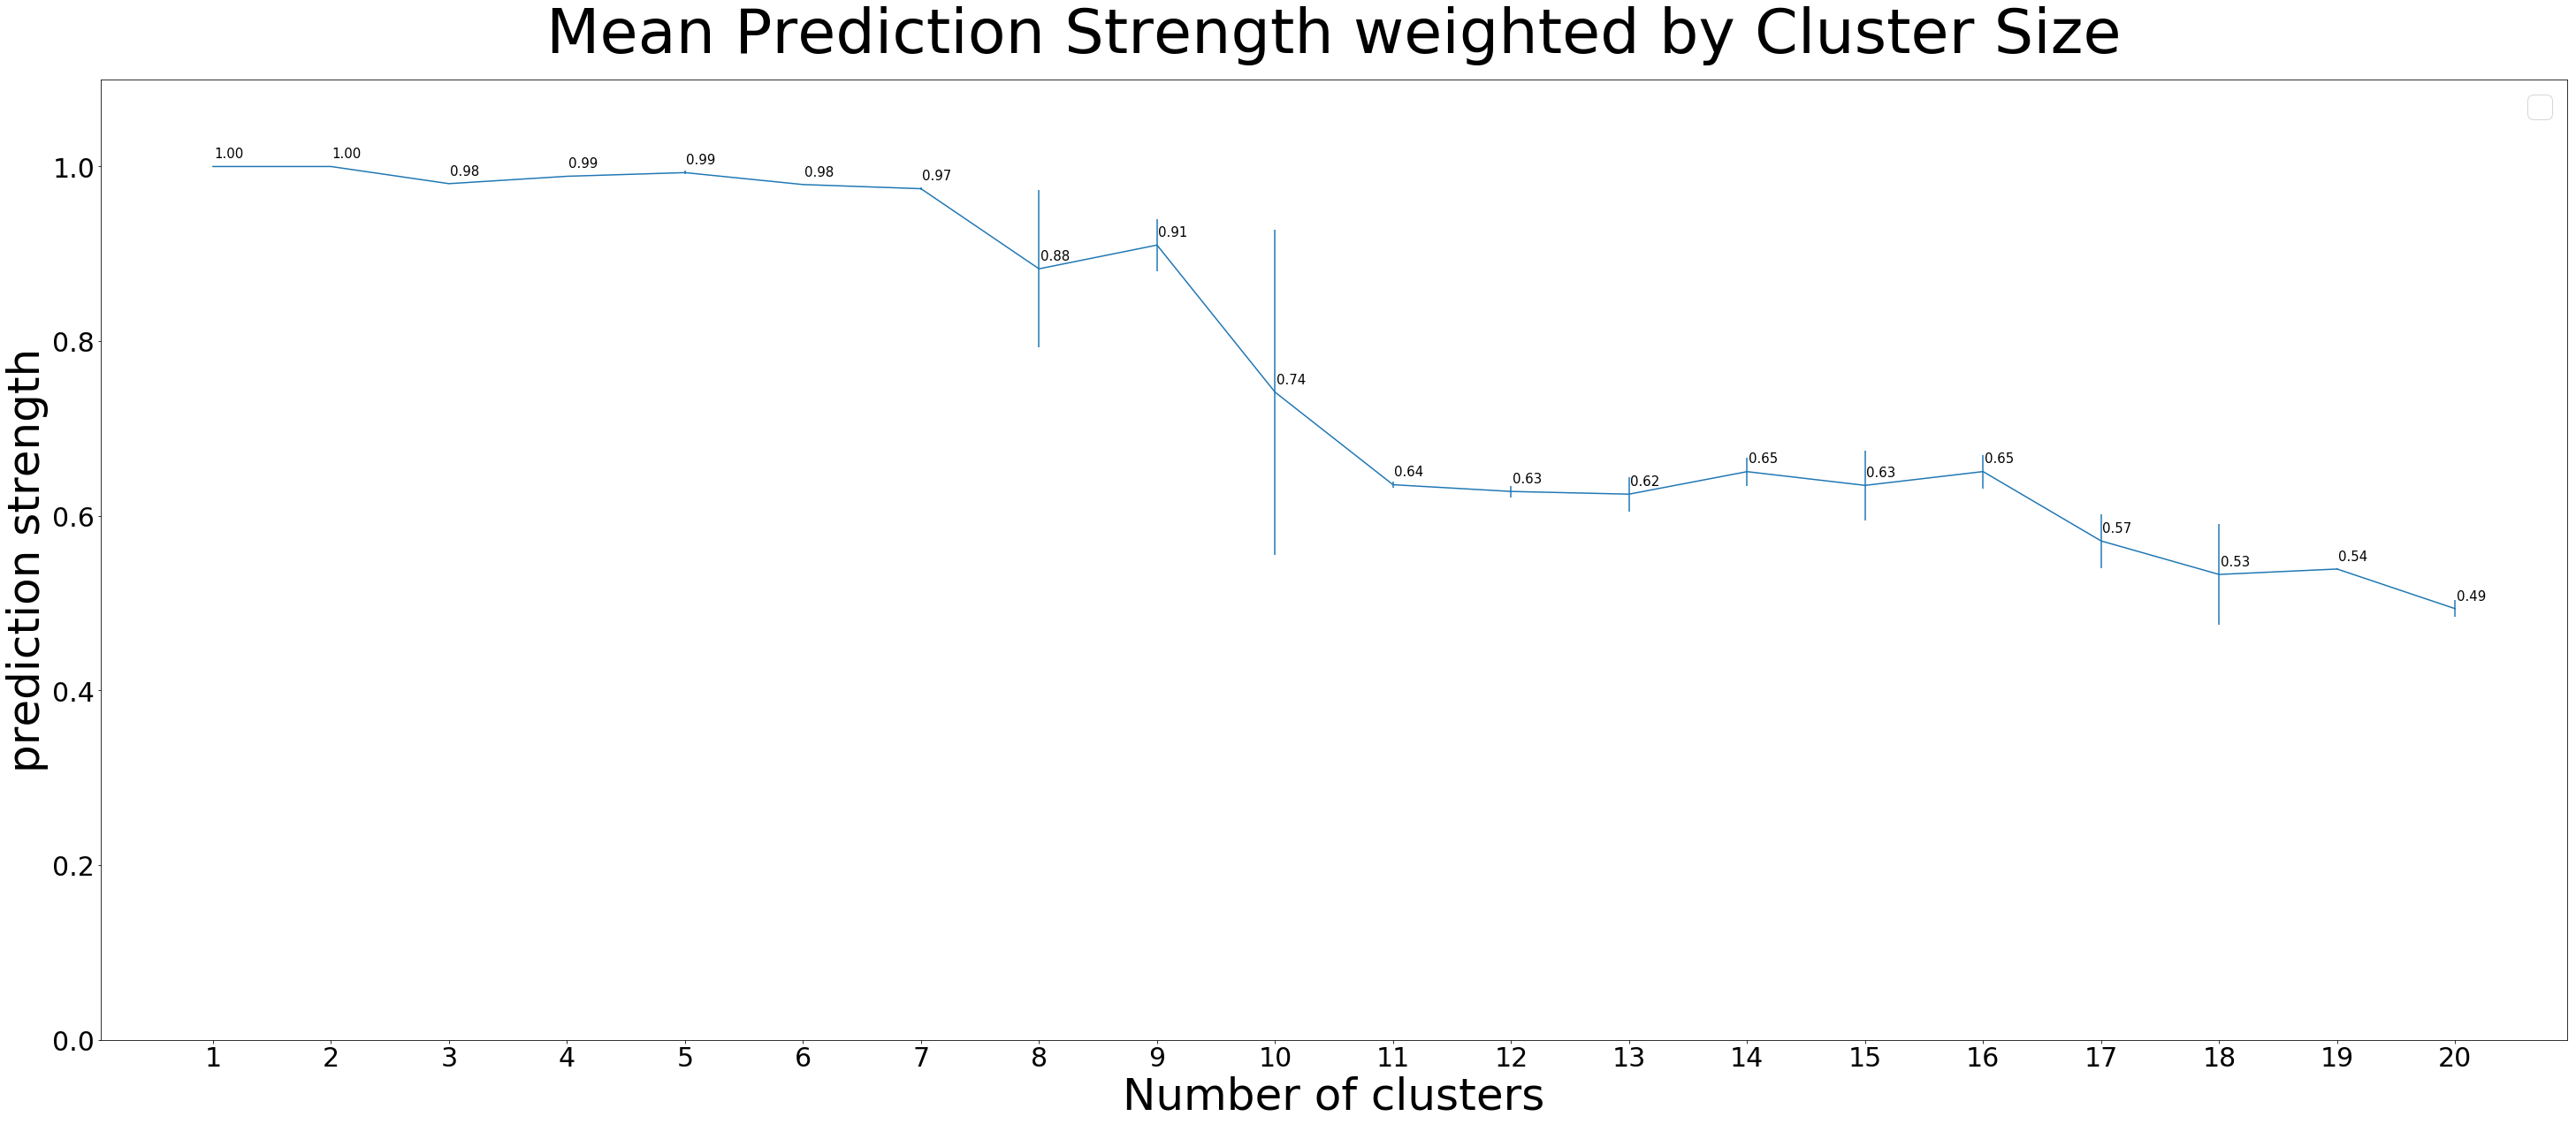

In [173]:
plot_proportion_weighted_mean_prediction_strengths(k_prediction_strength, valid_cluster_size, threshold = None)

In [174]:
k_low_individual_ps_bursts, k_low_individual_ps_cv_sizes,k_low_individual_ps_cv_sizes_prop = get_low_individual_ps_bursts(data,train_folds, valid_folds, train_fold_labels, valid_fold_labels,predictions_strengths_per_sample,threshold = threshold)

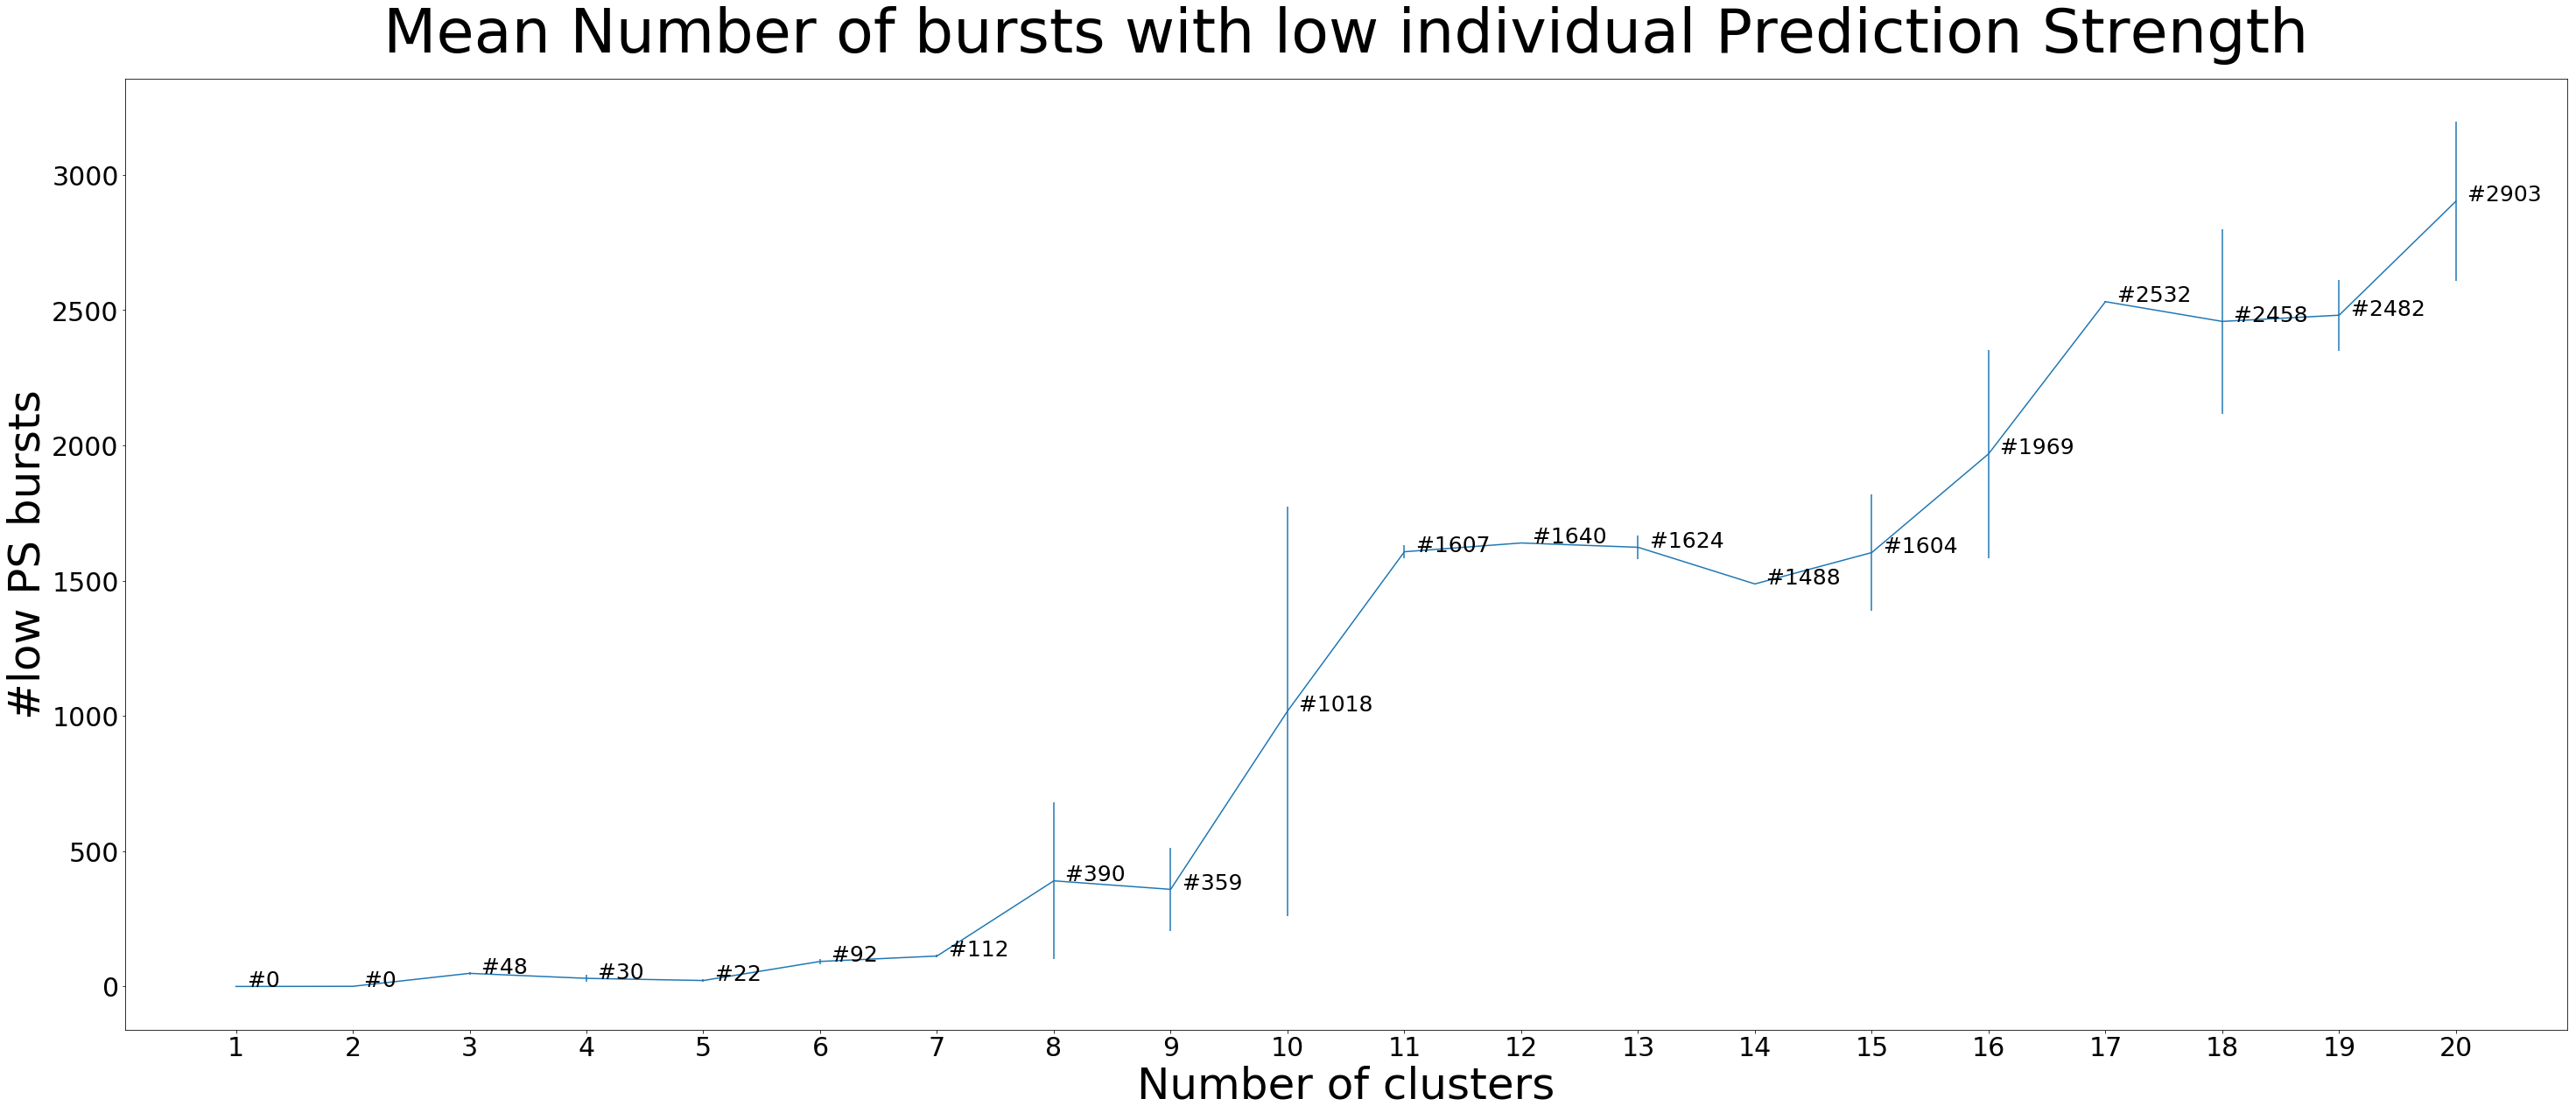

In [175]:
low_bursts ,low_burst_sizes,low_burst_sizes_prop = get_low_individual_ps_bursts(data,train_folds, valid_folds, train_fold_labels, valid_fold_labels ,predictions_strengths_per_sample,threshold = threshold)
plot_mean_number_of_low_prediction_strength_samples(low_burst_sizes, n_clusters = n_clusters)

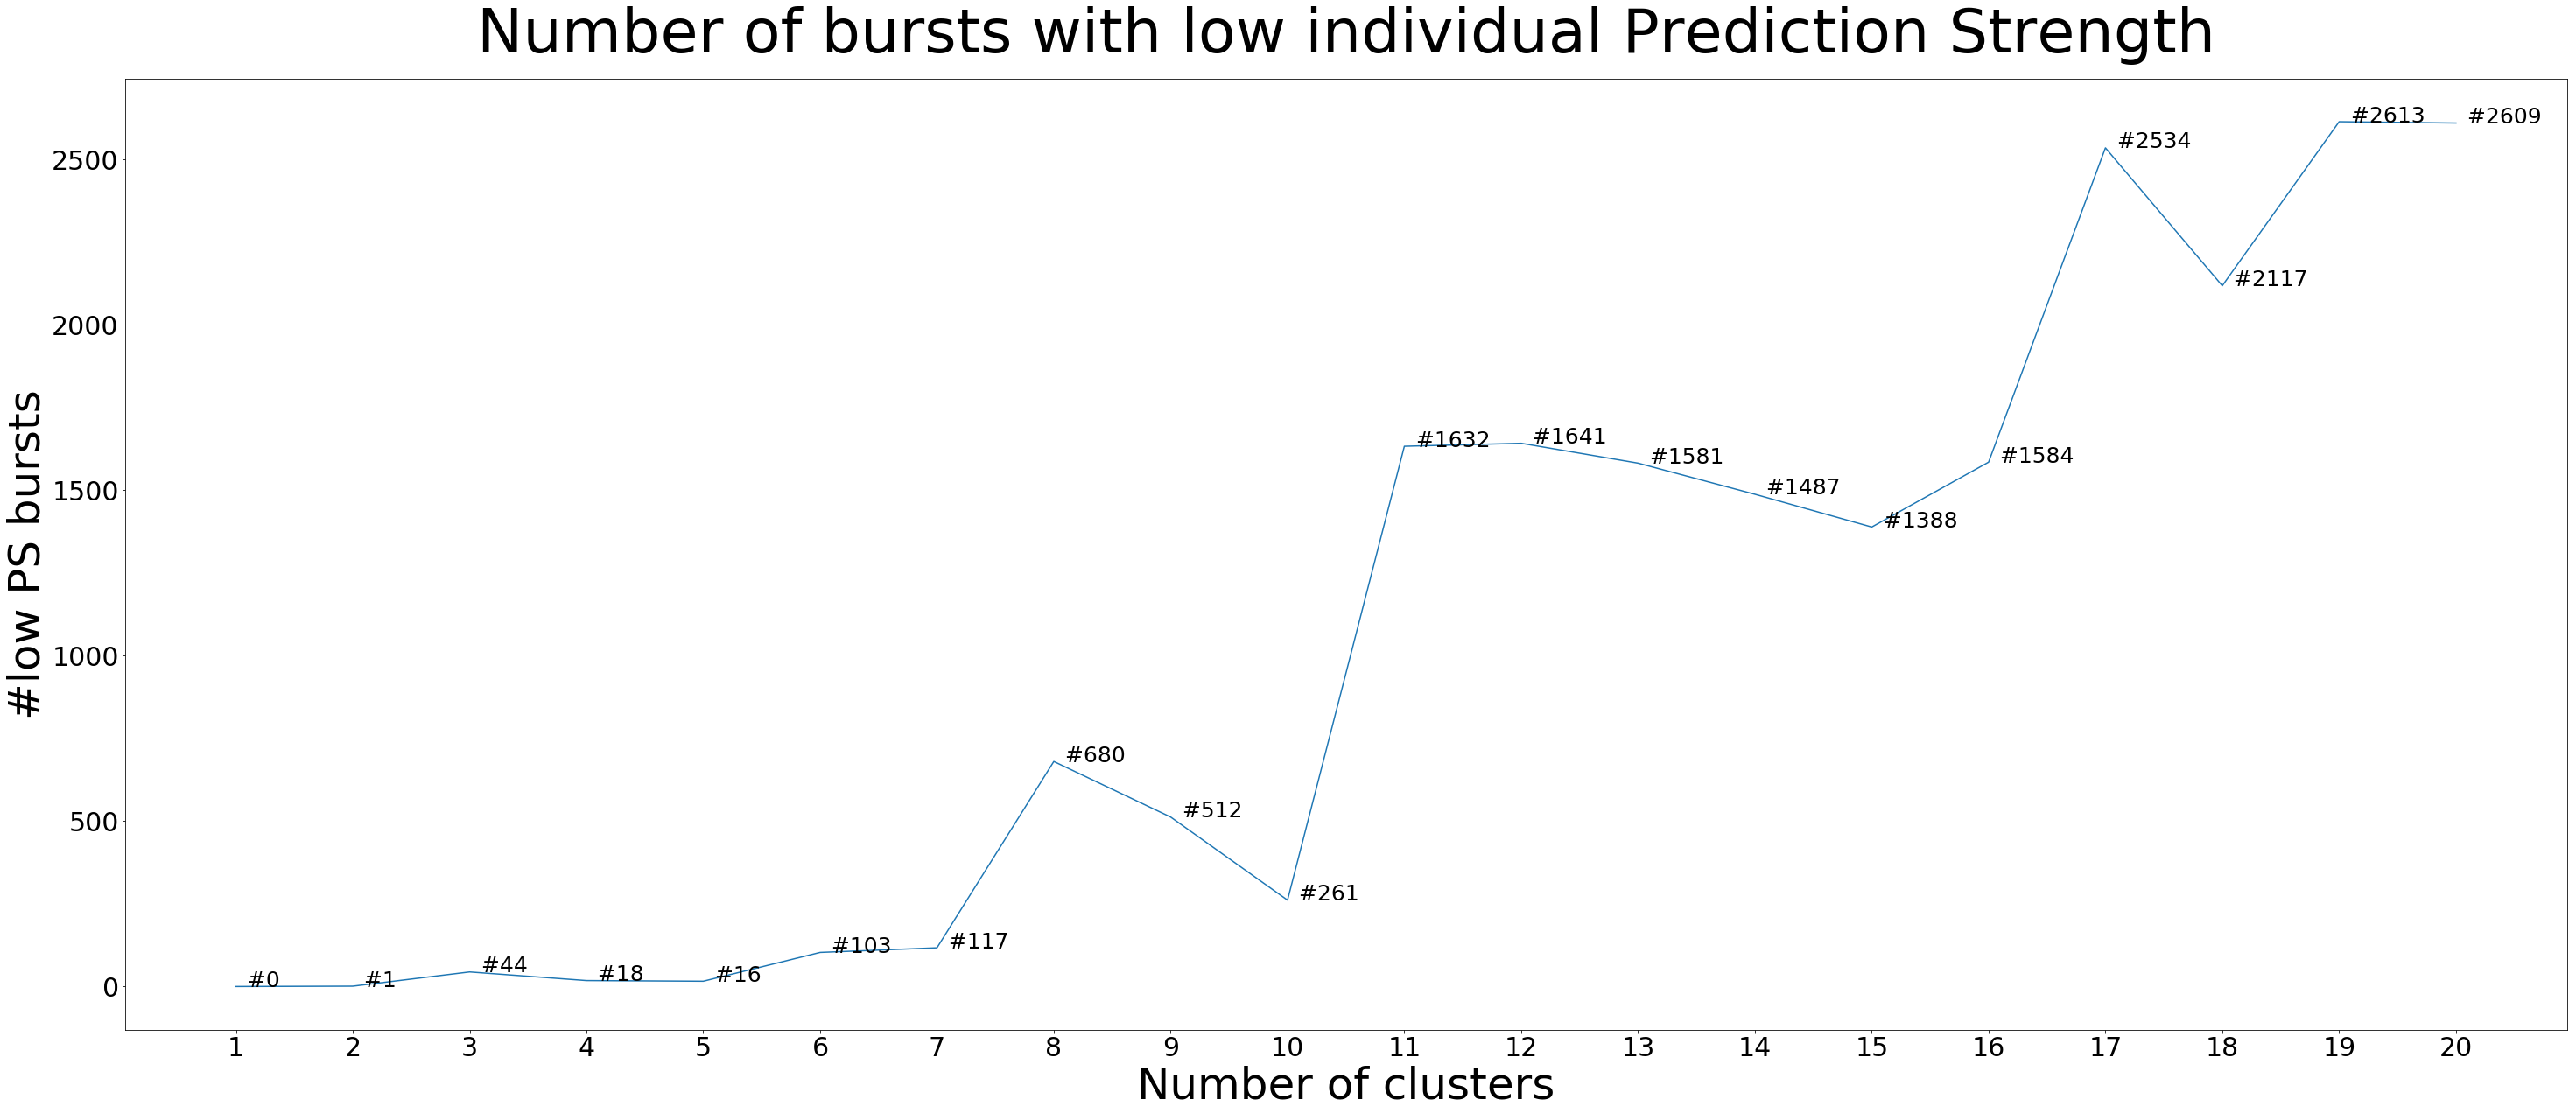

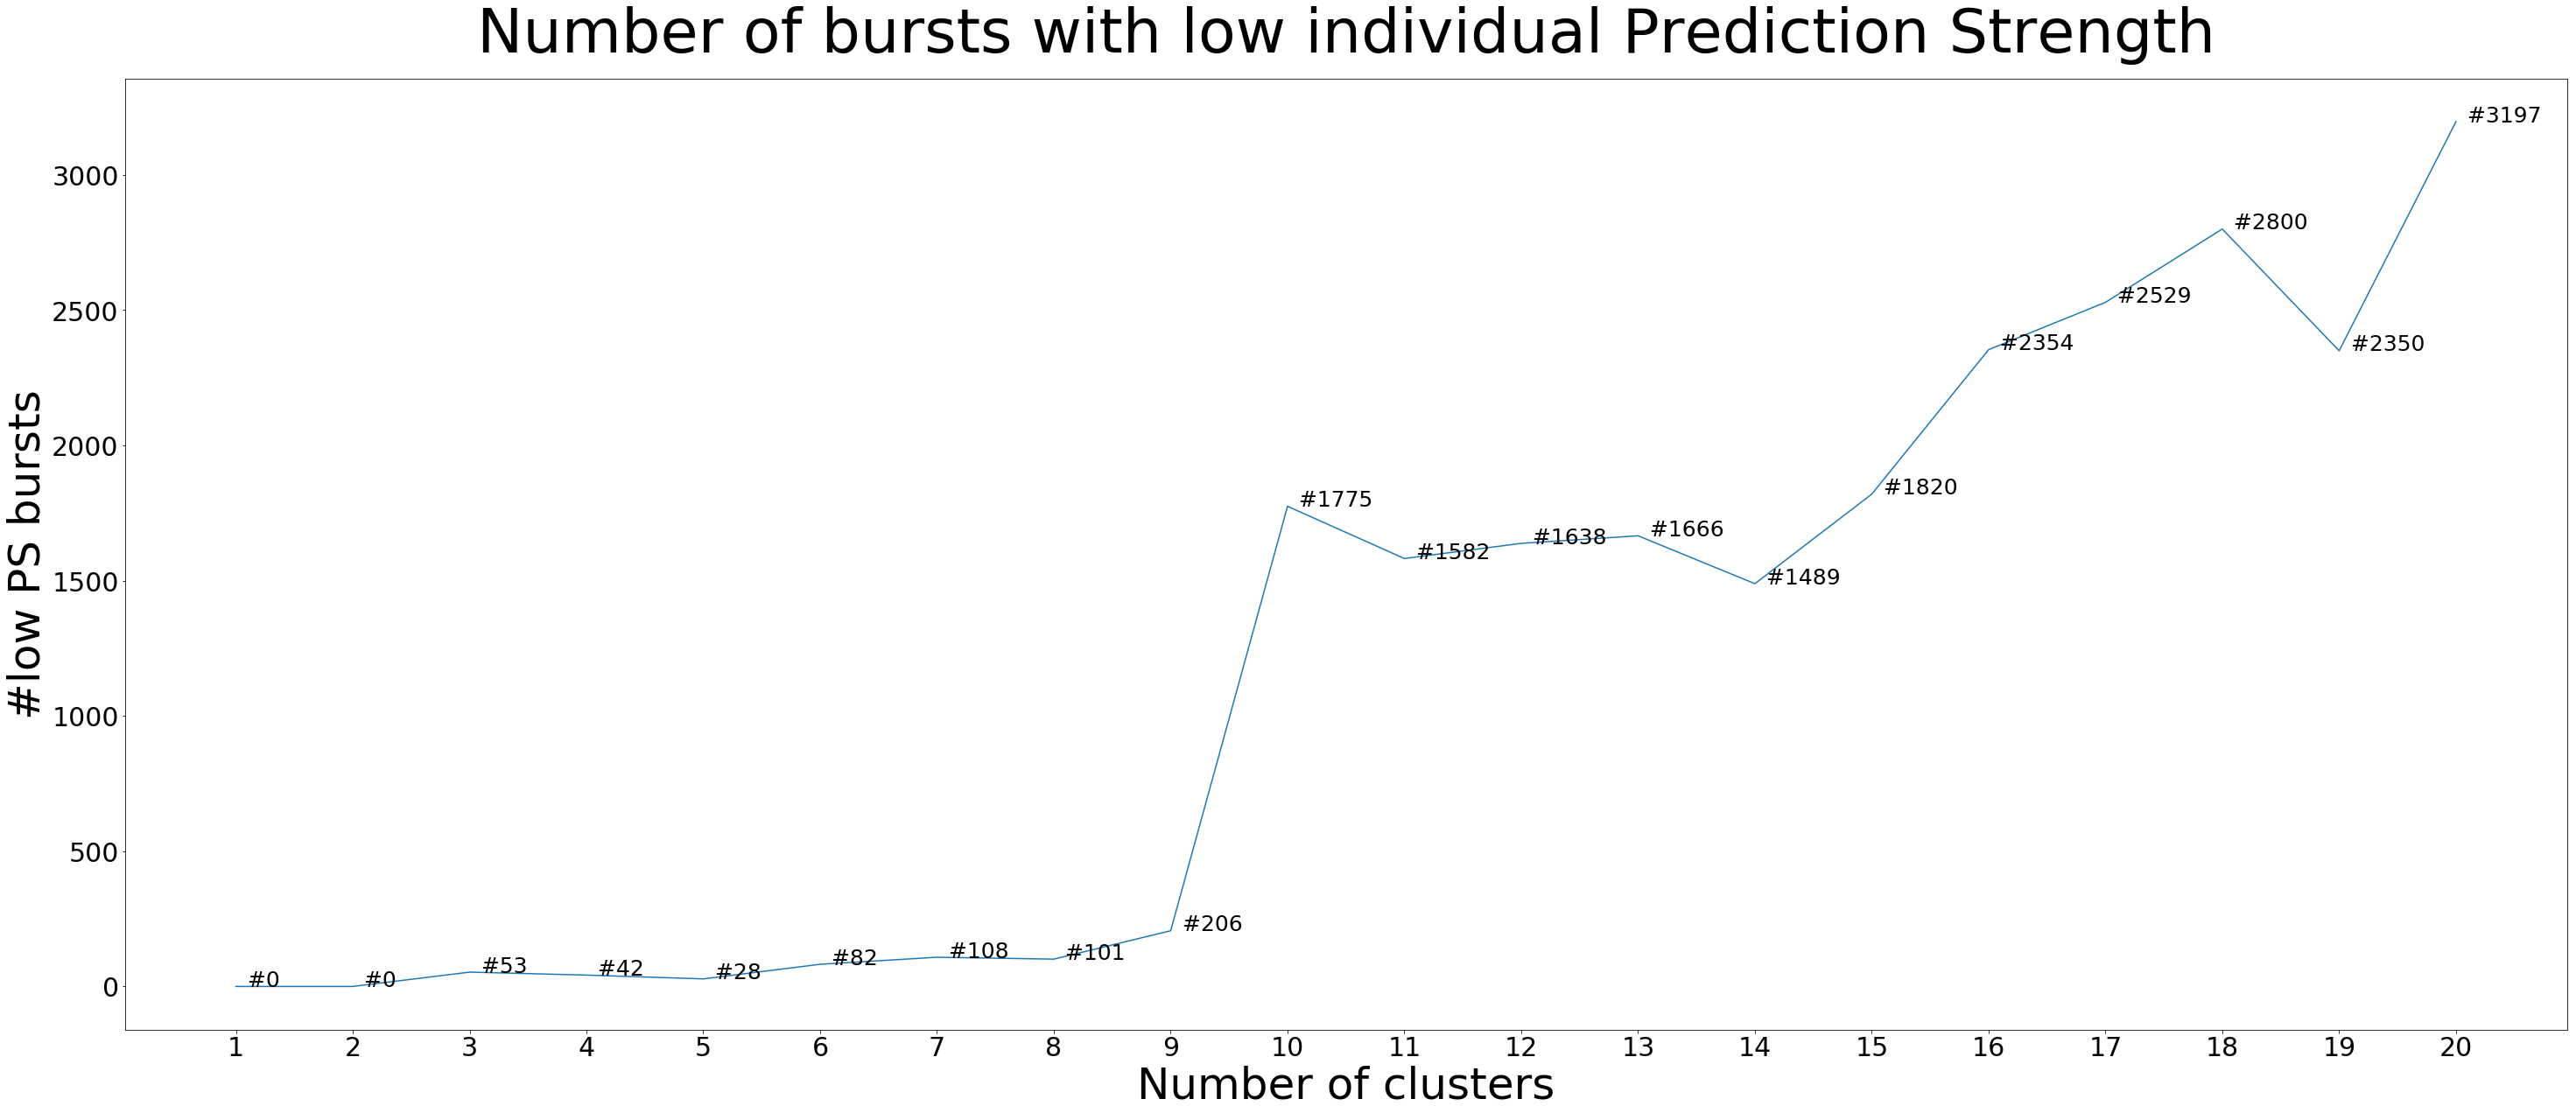

In [176]:
for i in range(n_folds):
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30) 
    fold_i_low_bursts,fold_i_low_burst_sizes,fold_i_low_burst_sizes_prop = get_low_individual_ps_bursts(data,[train_folds[i]], [valid_folds[i]], [train_fold_labels[i]], [valid_fold_labels[i]] ,[predictions_strengths_per_sample[i]],threshold = threshold)
    plot_mean_number_of_low_prediction_strength_samples(fold_i_low_burst_sizes, n_clusters = n_cluster)

In [177]:
n_folds = 2
n_clusters = range(20)


clustering_summary_statistics_per_fold = []
mean_prediction_strength_per_sample_per_fold = []

for i in range(n_folds):
    fold_i_statistics = []
    mean_prediction_strength_per_sample = []
    ps_per_sample_fold = predictions_strengths_per_sample[i]
    for k_clustering in ps_per_sample_fold:
        k_clustering_statistics = []
        mean_prediction_strength_per_sample.append(np.mean((sum(k_clustering,[]))))
        
        for cluster in k_clustering:  
            mean = np.mean(cluster)
            median = np.median(cluster)
            std = np.std(cluster)
            q1 = np.percentile(cluster, 25)
            q3 = np.percentile(cluster, 75)
            min_value = np.amin(cluster)
            max_value = np.amax(cluster)
            n = len(cluster)
            
            k_clustering_statistics.append((mean,median, std,q1,q3, min_value, max_value, n))
        fold_i_statistics.append(k_clustering_statistics)
    clustering_summary_statistics_per_fold.append(fold_i_statistics)
    mean_prediction_strength_per_sample_per_fold.append(mean_prediction_strength_per_sample)

In [149]:
mean_prediction_strength_per_sample_per_fold

[[1.0,
  0.98664513228845274,
  0.94940742452201277,
  0.99507269041485014,
  0.97496171580313806,
  0.98010094285299609,
  0.98528147513472086,
  0.98593495199923187,
  0.98859668659969846,
  0.98994806583164374,
  0.98815601273419951,
  0.78149555692208783,
  0.78803548659927303,
  0.50504043094737772,
  0.50090671581069213,
  0.53790059605756491,
  0.46386480523541423,
  0.44315209486686563,
  0.46510414393454552,
  0.46053676410033667],
 [1.0,
  0.99908369070613412,
  0.99328688618334682,
  0.99191038768323769,
  0.98731197953781258,
  0.98860682092363261,
  0.98539812249620762,
  0.99173824818800993,
  0.9900828992383035,
  0.99033848942038138,
  0.98974220088179865,
  0.75824375382578857,
  0.69702068949003282,
  0.71662920968778754,
  0.50794937933164686,
  0.53011497472920932,
  0.54000434690061172,
  0.55294612442585822,
  0.57966463900861342,
  0.54196010912089609]]

No handles with labels found to put in legend.


(0, 1.1)

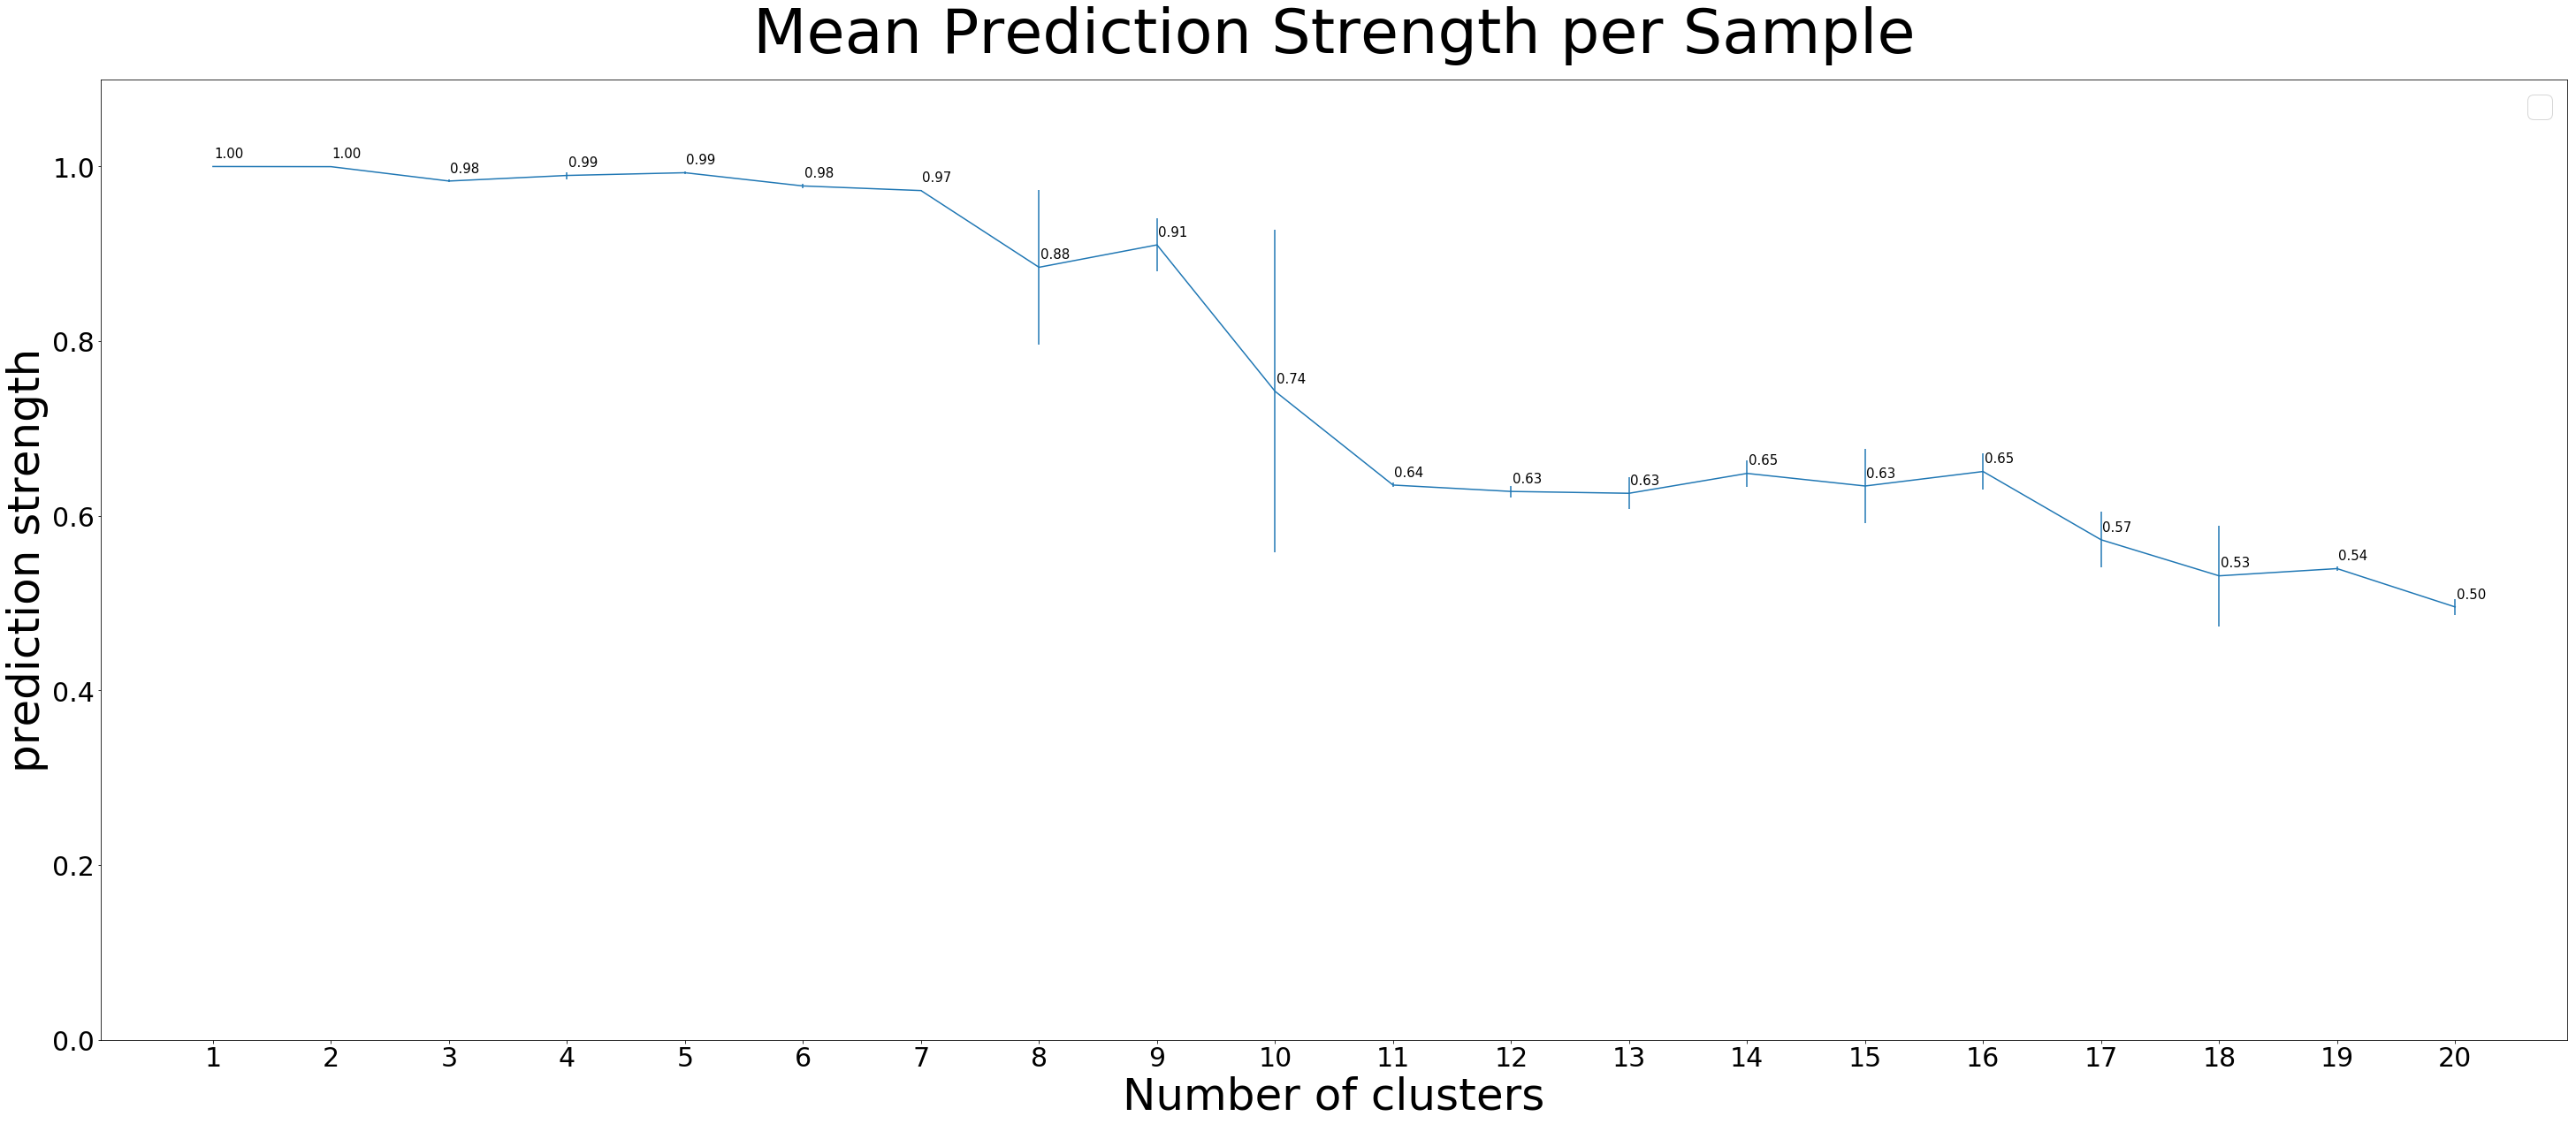

In [180]:
threshold = None
fig, ax = plt.subplots(figsize=(50,20))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30) 
  
mean_prediction_strength_per_sample = np.mean(mean_prediction_strength_per_sample_per_fold, axis = 0)
std_prediction_strength_per_sample = np.std(mean_prediction_strength_per_sample_per_fold, axis = 0)
n_clusters = range(1,21)  
ax.errorbar(n_clusters, mean_prediction_strength_per_sample, yerr=std_prediction_strength_per_sample)
for i,k in enumerate(n_clusters):
    ax.annotate("%.2f" % (mean_prediction_strength_per_sample[i]), (k+0.01,mean_prediction_strength_per_sample[i] + 0.01), fontsize = 15)
    


if threshold:
    ax.axhline(threshold, color = "red", label = "Threshold")
    plt.yticks(list(plt.yticks()[0]) + [threshold])
ax.set_title("Mean Prediction Strength per Sample", fontsize = 70,pad = 30)
ax.set_xticks(n_clusters)
ax.set_xlabel("Number of clusters",fontsize=50)
ax.set_ylabel("prediction strength",fontsize=50) 
ax.legend(fontsize = 35)
ax.set_ylim((0,1.1))

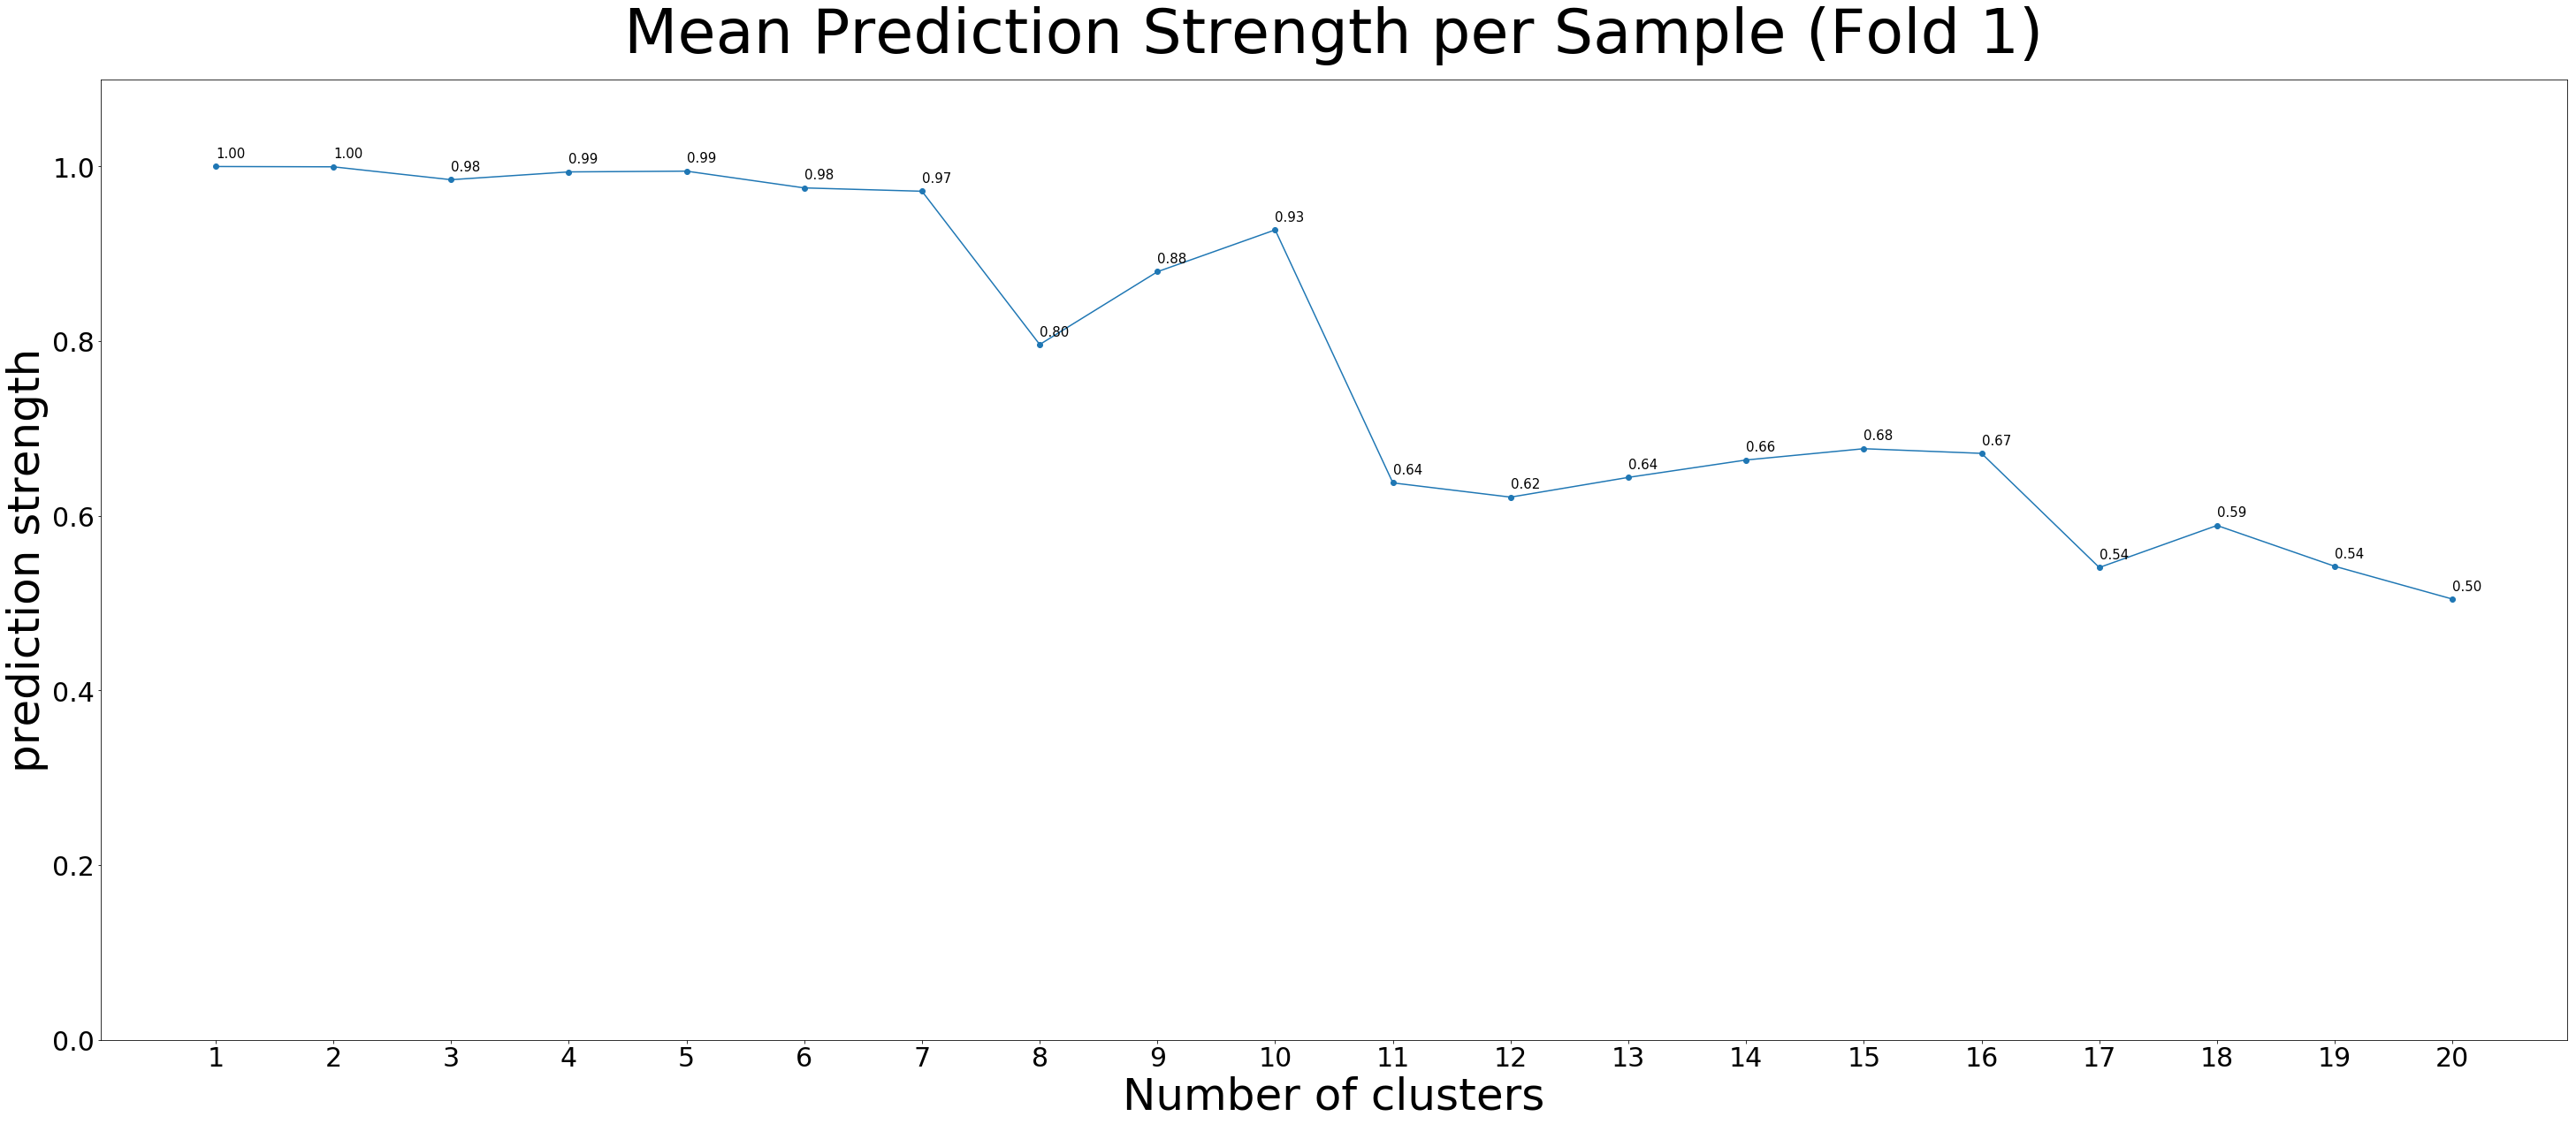

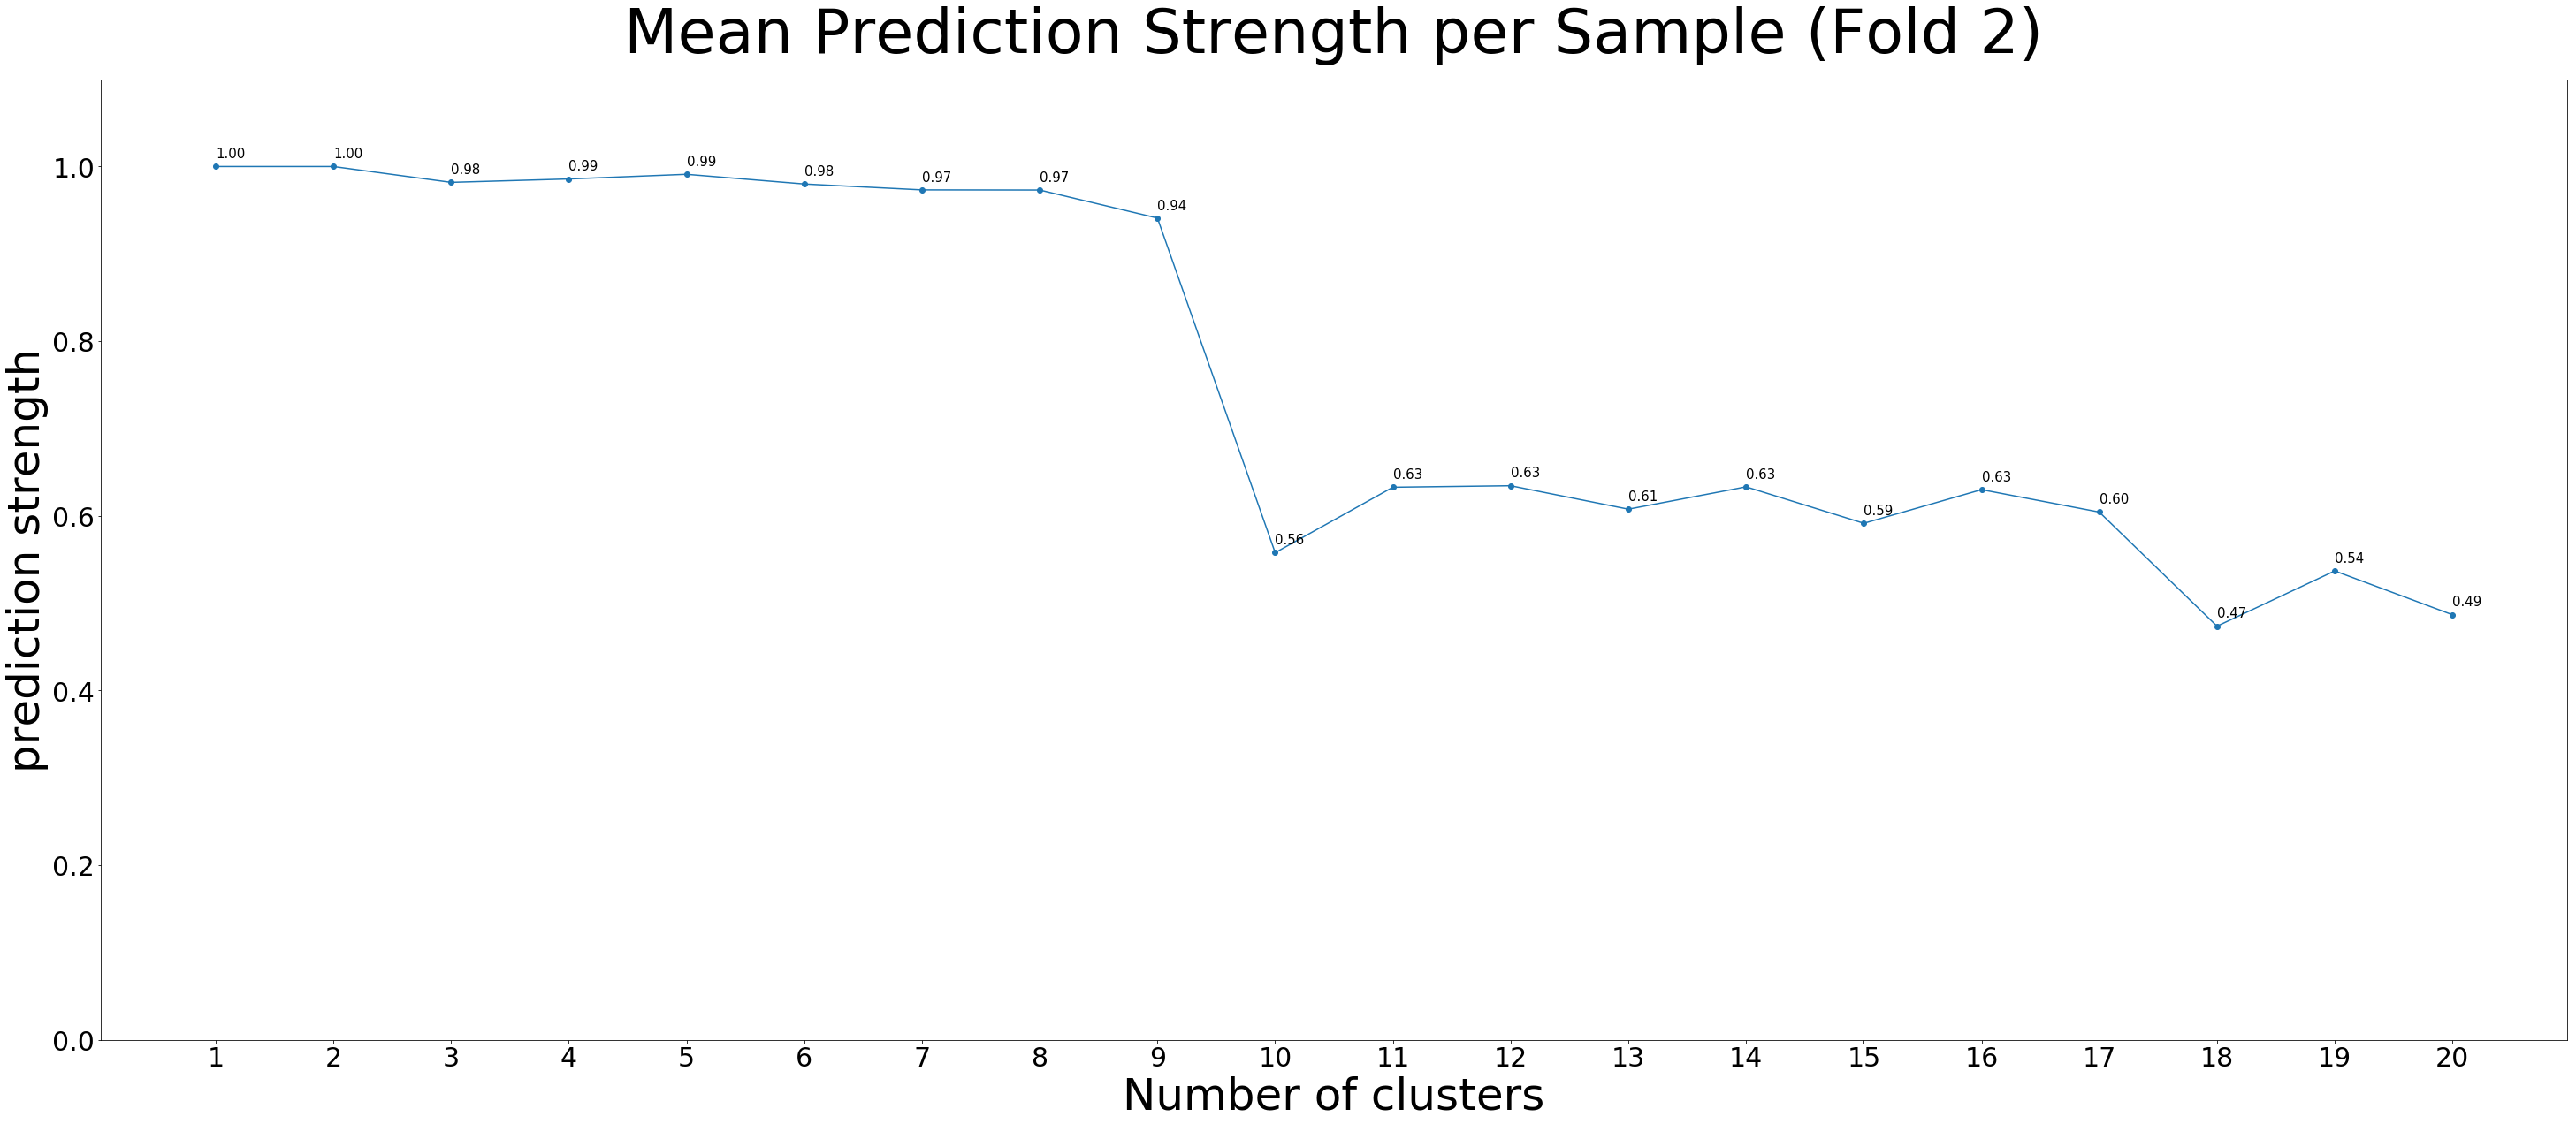

In [179]:
threshold = None

for i in range(n_folds):
    fig, ax = plt.subplots(figsize=(50,20))
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    ax.plot(n_clusters, mean_prediction_strength_per_sample_per_fold[i])
    ax.scatter(n_clusters, mean_prediction_strength_per_sample_per_fold[i])
    
    for k,cluster in enumerate(n_clusters):
        ax.annotate("%.2f" % (mean_prediction_strength_per_sample_per_fold[i][k]), (cluster,mean_prediction_strength_per_sample_per_fold[i][k] + 0.01), fontsize = 15)
    if threshold:
        ax.axhline(threshold, color = "red", label = "Threshold")
    
    ax.set_title("Mean Prediction Strength per Sample (Fold %d)" % (i+1), fontsize = 70,pad = 30)
    ax.set_xticks(n_clusters)
    ax.set_xlabel("Number of clusters",fontsize=50)
    ax.set_ylabel("prediction strength",fontsize=50) 
    ax.set_ylim((0,1.1))